In [ ]:
# ctrl + l  comment line short-cut

# sperate trainining and validaiton set 

# Preprocessing data manipulation
#

# Input Layer (3 channel image input layer)
# Convolutional (2D)
# Max Pooling
# Convolutional (2D)
# Max Pooling
# Dense (Output layer)

#pretrained model

In [1]:
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Needed to display matplotlib plots in Jupyter
get_ipython().run_line_magic('matplotlib', 'inline')

C:\Users\changgoo.kang\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 57600)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1843232   
__________

In [18]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
full_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                 validation_split=0.3)

In [20]:
imgdir = 'C://Users/changgoo.kang/resize_images' # Folder containing extracted images
training_set = full_datagen.flow_from_directory(imgdir, target_size=(128,128),
                                            batch_size=32,
                                            class_mode="categorical",
                                           subset='training')
test_set = full_datagen.flow_from_directory(imgdir, target_size=(128,128),
                                            batch_size=32,
                                            class_mode="categorical",
                                           subset='validation')

Found 1491 images belonging to 12 classes.
Found 631 images belonging to 12 classes.


In [21]:
history = model.fit_generator(
      training_set,
      steps_per_epoch=160,
      epochs=15,
      validation_data=test_set,
      validation_steps=160)

Epoch 1/15
160/160 [==============================] - 188s 1s/step - loss: 1.5567 - acc: 0.5013 - val_loss: 1.0524 - val_acc: 0.6305
Epoch 2/15
160/160 [==============================] - 192s 1s/step - loss: 0.8405 - acc: 0.7311 - val_loss: 0.6929 - val_acc: 0.7647
Epoch 3/15
160/160 [==============================] - 190s 1s/step - loss: 0.6089 - acc: 0.7979 - val_loss: 0.5964 - val_acc: 0.7977
Epoch 4/15
160/160 [==============================] - 188s 1s/step - loss: 0.5122 - acc: 0.8259 - val_loss: 0.4852 - val_acc: 0.8475
Epoch 5/15
160/160 [==============================] - 189s 1s/step - loss: 0.4248 - acc: 0.8606 - val_loss: 0.4791 - val_acc: 0.8423
Epoch 6/15
160/160 [==============================] - 185s 1s/step - loss: 0.3767 - acc: 0.8761 - val_loss: 0.4426 - val_acc: 0.8453
Epoch 7/15
160/160 [==============================] - 184s 1s/step - loss: 0.3441 - acc: 0.8823 - val_loss: 0.4375 - val_acc: 0.8516
Epoch 8/15
160/160 [==============================] - 194s 1s/step - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


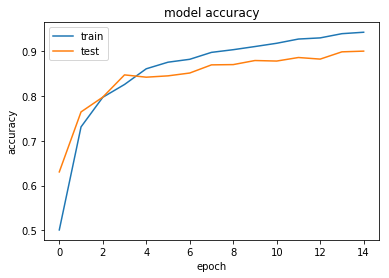

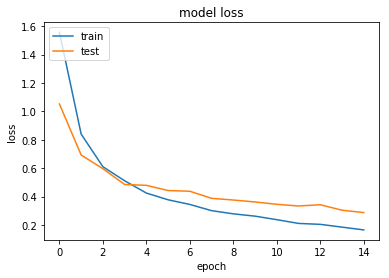

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
import os
import shutil
import numpy as np
from PIL import Image
imgdir = 'C://Users/changgoo.kang/skclass_test' # Folder containing extracted images
# loop recursively through the folders
dir_num = 0
for root,folders,filenames in os.walk(imgdir):
    print(root) 
    print(folders) 
    print(filenames)
    for file in filenames:
        # in each folder, get the first file
        filePath = root + '/' + file
        print(filePath)
        # Open it and add it to the figure (in a 4-row grid)
        img = Image.open(filePath)
        #a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        img.thumbnail((128,128))
        imgNew = Image.new("RGB", (128,128), "white")
        offsetX = int((128 - img.width)/2)
        offsetY = int((128 - img.height)/2)
        imgNew.paste(img, (offsetX, offsetY))
        resizePath = 'C://Users/changgoo.kang/resize_test/'
        if not os.path.exists(resizePath):
            os.mkdir(resizePath)

        imgNew.save(resizePath + file)

C://Users/changgoo.kang/skclass_test
[]
['test01.jpg', 'test02.jpg', 'test03.jpg', 'test04.jpg', 'test05.jpg']
C://Users/changgoo.kang/skclass_test/test01.jpg
C://Users/changgoo.kang/skclass_test/test02.jpg
C://Users/changgoo.kang/skclass_test/test03.jpg
C://Users/changgoo.kang/skclass_test/test04.jpg
C://Users/changgoo.kang/skclass_test/test05.jpg


{0: 'axes', 1: 'boots', 2: 'carabiners', 3: 'crampons', 4: 'gloves', 5: 'hardshell_jackets', 6: 'harnesses', 7: 'helmets', 8: 'insulated_jackets', 9: 'pulleys', 10: 'rope', 11: 'tents'}
test01.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
test02.jpg
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
test03.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
test04.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
test05.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


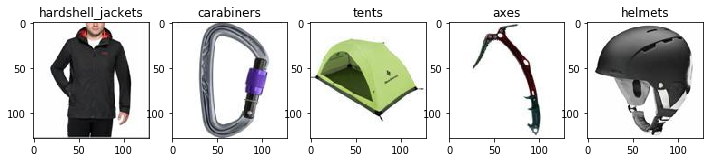

In [45]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Needed to display matplotlib plots in Jupyter
%matplotlib inline

imgdir = 'C://Users/changgoo.kang/resize_test' # Folder containing images to check
categories = training_set.class_indices

categories = {v: k for k, v in categories.items()}
print(categories)
# Create a figure to display the images
fig = plt.figure(figsize=(12, 16))

# loop recursively through the folders
dir_num = 0
for root, folders, filenames in os.walk(imgdir):
    for imgFile in filenames:
        print(imgFile)
        # in each folder, get the first file
        a=fig.add_subplot(1,5,dir_num + 1)
        #filePath = os.path.join(root,imgFile)
        filePath = root + '/' + imgFile
        # Open it and add it to the figure (in a 4-row grid)
        img = Image.open(filePath)
        imgplot = plt.imshow(img)
        # Add the file name (the class of the image)
        im = load_img(filePath)
        prediction = model.predict(np.reshape(im,[1,128,128,3]),verbose=0)
        print(prediction)
        a.set_title(categories[np.argmax(prediction)]) # + " (" + str(np.max(prediction)) + ")")
        dir_num = dir_num + 1

In [46]:
model.save('Conv_gear_v1.h5')

In [47]:
from keras.applications import VGG16

In [48]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
print(vgg.summary())

58892288/58889256 [==============================] - 189s 3us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_po